# Principal Component Analysis

### 🧠 1. What is PCA?

Principal Component Analysis (PCA) is a powerful statistical technique used for:

* Dimensionality Reduction: Reducing the number of features in a dataset while retaining most of the original information.
* Data Visualization: Especially useful when visualizing high-dimensional data in 2D or 3D.
* Noise Reduction: Filtering out less significant components to reduce noise.

#### 📌 Key Idea:
* PCA transforms the data into a new coordinate system where the greatest variances are on the first coordinates (principal components).

### 📊 2. Why Use PCA?

* When dealing with high-dimensional data, models can become complex and prone to overfitting.
* Reducing dimensions can:
* Improve model performance.
* Decrease computation time.
* Simplify visualization and interpretability.

### 🎯 3. How Does PCA Work? (Simplified Steps)

1. Standardize the Data: Ensure all features contribute equally.
2. Compute the Covariance Matrix: Understand how features vary with each other.
3. Calculate Eigenvectors and Eigenvalues: Identify principal components.
4. Sort and Select Principal Components: Based on explained variance.
5. Transform the Data: Recast the original data along the selected principal components.

### 🔍 4. Key Terms:

* Principal Components: New axes along which data variance is maximized.
* Eigenvectors: Directions of these new axes.
* Eigenvalues: Magnitudes showing the importance of each eigenvector.
* Covariance Matrix: Measures the variance between features.

### 🛠️ 5. Simple Example:

Imagine a dataset of people's height and weight. These two features are highly correlated. PCA would combine these into a new feature that captures most of the variance in the data while reducing redundancy.

### 🧠 **1. Mathematical Foundations of PCA**

#### **Step-by-Step Process of PCA:**

1. **Standardize the Data:**
   PCA is sensitive to the scale of data. Standardization ensures all features contribute equally:
   $$X' = \frac{X - \mu}{\sigma}$$
   * $X$: Original data
   * $\mu$: Mean of each feature
   * $\sigma$: Standard deviation of each feature

2. **Compute the Covariance Matrix:**
   The covariance matrix shows how variables vary together:
   $$\text{Cov}(X) = \frac{1}{n-1} X'^\top X'$$
   Where:
   * $X'$ is the standardized data matrix.
   * The covariance matrix is **square** with dimensions equal to the **number of features**.

3. **Calculate Eigenvectors and Eigenvalues:**
   * **Eigenvectors:** Indicate directions of maximum variance (principal components).
   * **Eigenvalues:** Indicate the magnitude of the variance along these directions.
   
   The equation:
   $$A \vec{v} = \lambda \vec{v}$$
   * $A$: Covariance matrix
   * $\vec{v}$: Eigenvector
   * $\lambda$: Eigenvalue

4. **Sort and Select Principal Components:**
   * Sort eigenvectors by their eigenvalues in **descending order**.
   * Select the **top k** eigenvectors based on the desired level of variance explained.

5. **Transform the Data:**
   The data is then projected onto the new principal components:
   $$X_{\text{reduced}} = X' W$$
   * $W$: Matrix of selected eigenvectors

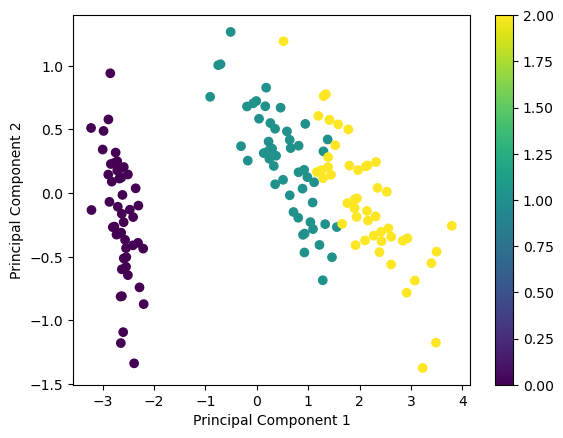

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class PCA:
    def __init__(self, n_components: int):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X: np.ndarray) -> None:
        # Standardize data (zero mean, unit variance)
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # Calculate covariance matrix
        cov_matrix = np.cov(X, rowvar=False)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Sort eigenvectors by eigenvalues in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Select the top n_components
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X: np.ndarray) -> np.ndarray:
        # Project data onto principal components
        X = X - self.mean
        return np.dot(X, self.components)

# Example usage with Iris dataset
if __name__ == '__main__':
    data = datasets.load_iris()
    X = data.data
    y = data.target

    pca = PCA(n_components=2)
    pca.fit(X)
    X_transformed = pca.transform(X)

    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()